In [1]:
import sympy as sym
from sympy.polys import subresultants_qq_zz

sym.init_printing()

Although the resultant of two univariate polynomials is known as the determi-
nant of their Sylvester matrix, the original definition is given by the determinant
of Bezout matrix, introduced by Bézout in 1748. The entries of Bezout matrix
are bilinear functions of coefficients of the given polynomials. The Bezout formulation has gone over
different generalizations. The most common one is the Cayley that is used after for the Dixon 
formulation as well. Caley's paper is in French thus I can to retrive the original formulation. But from here
I am considering this formulation.

% ** Hereafter, we suppose that $n =$ deg$(p)$ $\geq$  $m = $ deg$(q)$. **

$$\left|\begin{matrix}
p(x) & q(x)\cr
p(a)& q(a)
\end{matrix}%
\right|= \Delta(x, a)$$

$\Delta(x, a)$ is the determinant of the matrix.

We have the polynomial:

$$ \delta(x, a) = \frac{\Delta(x,a)}{x-a}$$

The Bezout matrix is highly related to the Sylvester matrix and the great-
est common divisor of polynomials. Unlike in Sylvester's formulation, where the resultant of $p$ and $q$ is the determinant of an $(m + n) \times (m + n)$ matrix, in the Cayley formulation, the resultant is obtained
as the determinant of a $n \times n$ matrix.

In [2]:
b, c, d, e  = sym.symbols('b, c, d, e')
x = sym.symbols('x')

In [3]:
p = sym.lambdify(x, b * x ** 3 + c * x ** 2 + d * x + e)
q = sym.lambdify(x, sym.diff(p(x), x))

In [4]:
def caley_bezout(p, q, x):
    """
    Returns the Caley's reformulation of Bezout's matrix.
    Will refeer to it as Caley-Bezout matrix.
    """
    a = sym.symbols('a')
    bezout_matrix = sym.Matrix([[p(x), q(x)], [p(a), q(a)]])
     
    bezout_polynomial = (bezout_matrix.det() / (x - a)).factor().collect(a)
    coefficients = sym.Poly(bezout_polynomial, a).coeffs()
    
    matrix = sym.Matrix([sym.Poly(row, x).coeffs() for row in coefficients])
    
    return matrix

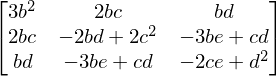

In [5]:
caley_bezout(p, q, x)

Numerical Example One
---------------------

In [6]:
f = sym.lambdify(x, x ** 2 - 5 * x + 6)
g = sym.lambdify(x, x ** 2 - 3 * x + 2)

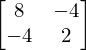

In [7]:
subresultants_qq_zz.bezout(f(x), g(x), x)

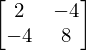

In [8]:
subresultants_qq_zz.bezout(f(x), g(x), x, method='prs')

In [9]:
caley_bezout(f, g, x).det()

Numerical Example Two
---------------------

In [10]:
z = sym.lambdify(x, x ** 2 - 7 * x + 12)
h = sym.lambdify(x, x ** 2 - x)

In [11]:
caley_bezout(z, h, x).det()

Numerical Example Three
-----------------------

In [12]:
y = sym.symbols('y')

In [13]:
f = sym.lambdify(y, x ** 2 + x * y + 2 * x + y -1)
g = sym.lambdify(y, x ** 2 + 3 * x - y ** 2 + 2 * y - 1)
f(x), g(x)

In [14]:
caley_bezout(f, g, y).det().factor()

Dixon's Resultant
-----------------

Dixon (1908) showed how to extend this formulation to $n + 1$ polynomials in $n$ variables.

In a similar manner but this time,

$$\left|\begin{matrix}
p(x, y) & q(x, y) & h(x, y) \cr
p(a, y) & q(a, y) & h(b, y) \cr
p(a, b) & q(a, b) & h(a, b)
\end{matrix}%
\right|= \Delta(x, y, \alpha, \beta)$$

Thus, we have the polynomial:

$$ \delta(x,y, \alpha, \beta) = \frac{\Delta(x, y, \alpha, \beta)}{(x-\alpha)(y - \beta)}$$

In [15]:
from sympy.polys.monomials import itermonomials
import numpy as np
import functools

**Example of Dixon for n=2, m=3 case.**

In [16]:
a_1, a_2, b_1, b_2, u_1, u_2, u_3 = sym.symbols('a_1, a_2, b_1, b_2, u_1, u_2, u_3')

In [17]:
a, b = sym.symbols('alpha, beta')

In [18]:
p = sym.lambdify((x, y), a_1 * x ** 2 * y ** 2 + a_2 * x ** 2)
q = sym.lambdify((x, y), b_1 * x ** 2 * y ** 2 + b_2 * y ** 2)
h = sym.lambdify((x, y), u_1 * x + u_2 * y + u_3)

In [19]:
def dixon_polynomial(p, q, h, x, y):
    """
    Returns the Dixon polynomial, \delta(x, y, \alpha, \beta).
    """
    a, b = sym.symbols('alpha, beta')
    
    matrix = sym.Matrix([[p(x, y), q(x, y), h(x, y)], 
                         [p(a, y), q(a, y), h(a, y)],
                         [p(a, b), q(a, b), h(a, b)]])
    return sym.Poly((matrix.det() / ((x - a) * (y - b))).factor(), a, b)

In [20]:
def get_coeff_of_alpha(polynomial):
    """
    Returns the coefficients of terms x, y in Dixon's polynomial
    when viewed as a polynomial of \alpha.
    """
    coeffs = []
    for a_p, b_p in polynomial.monoms():
        mono = a ** (a_p) * b ** (b_p)
        coeffs.append(polynomial.coeff_monomial(mono))
        
    return coeffs

In [21]:
def construct_dixon_matrix(coeffs, x, y, size):
    """
    Construct the Dixon matrix from the coefficients of polynomial \alpha. Each coefficient is
    viewed as a polynomial of x and y.
    """
    
    mononomials = list(itermonomials([x, y], 4))
    array = np.array([[sym.Poly(c, x, y).coeff_monomial(m) for m in mononomials] for c in coeffs])
    
    return sym.Matrix(np.delete(array, np.nonzero((array==0).sum(axis=0) == size), axis=1))

In [22]:
def dixon_matrix(p, q, h, x, y):
    """
    Returns the Dixon matrix.
    """
    
    polynomial = dixon_polynomial(p, q, h, x, y)
     
    size = len(polynomial.monoms())
    
    coeffs = get_coeff_of_alpha(polynomial)
    matrix = construct_dixon_matrix(coeffs, x, y, size)
    
    return matrix

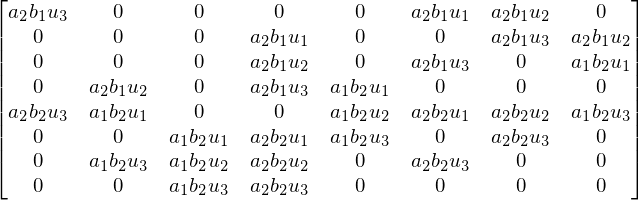

In [23]:
matrix = dixon_matrix(p, q, h, x, y)
matrix

In [24]:
matrix.det().factor()

Dixon's General Case
--------------------

In [60]:
class DixonResultant():
    """
    A class for retrieving the Dixon's resultant of a multivariete system.
    """
    
    def __init__(self, polynomials, variables):
        """
        Parameters
        ----------          
        n: integer
            Number of variables
        m: integer
            Number of ndegree polynomials (n + 1).
        variables: list
            A list of all n variables
        polynomials : list of sympy polynomials
            A  list of m ndegree popynomials
        degree: integer
        """
        self.polynomials = polynomials
        self.variables = variables
        
        self.n = len(self.variables)
        self.m = len(self.polynomials)
        
        a = sym.IndexedBase("alpha")
        self.dummy_variables = [a[i] for i in range(self.n)]
        
        self.max_degree = self.degree()
    
    def degree(self):
        degree = []
        for v in variables:
            degree.append(max([sym.Poly(f(*self.variables)).degree(v) for f in self.polynomials]))
        return sum(degree)
    
    def get_dixon_polynomial(self):
        
        if self.m != (self.n + 1):
            raise Exception('Method invalid for given combination.')
        
        # first row
        rows = [[poly(*self.variables) for poly in self.polynomials]]
        
        temp = [*self.variables]
        iterator = iter(self.dummy_variables)
        
        for idx in (idx for idx in range(self.n)):
            temp[idx] = next(iterator)
            rows.append([poly(*temp) for poly in self.polynomials])
 
        matrix = sym.Matrix(rows)
        product_of_differences = functools.reduce(lambda x, y: x * y, 
                                                  [a - b for a, b in zip(self.variables, self.dummy_variables)])
        return sym.Poly((matrix.det() / product_of_differences).factor(), *self.dummy_variables)

    
    def get_coeff_of_alpha(self, polynomial):
        """
        Returns the coefficients of terms x_i...x_n in \delta when viewed as a polynomial
        of \alpha_i...\alpha_n.
        """
        coeffs = []
        for monoms_powers in polynomial.monoms():
            mono = functools.reduce(lambda i, j: i * j,
                                    [a ** b for a, b in zip(self.dummy_variables, monoms_powers)])
            coeffs.append(polynomial.coeff_monomial(mono))

        return coeffs
    
    def dixon_matrix(self, coeffs, size):
        """
        Construct the Dixon matrix from the coefficients of polynomial \alpha. Each coefficient is
        viewed as a polynomial of x and y.
        """  
        mononomials = list(itermonomials(variables, self.max_degree))
        array = np.array([[sym.Poly(c, *variables).coeff_monomial(m) for m in mononomials] for c in coeffs])
    
        return sym.Matrix(np.delete(array, np.nonzero((array==0).sum(axis=0) == size), axis=1))

In [61]:
polynomials = [p, q, h]

In [62]:
variables = [x, y]

In [63]:
D = DixonResultant(polynomials, variables)
poly = D.get_dixon_polynomial()

In [64]:
coeff = D.get_coeff_of_alpha(poly)
size = len(poly.monoms())

In [65]:
D.dixon_matrix(coeff, size).det().factor()

Example 2
---------

In [32]:
a, b, c = sym.symbols('a, b, c')

In [33]:
p_1 = sym.lambdify((x, y), a * x ** 2 + b * x * y + (b + c - a) * x + a * y + 3 * (c - 1))
p_2 = sym.lambdify((x, y), 2 * a ** 2 * x ** 2 + 2 * a * b * x * y + a * b * y + b ** 3)
p_3 = sym.lambdify((x, y), 4 * (a - b) * x + c * (a + b) * y + 4 * a * b)
p_3(x, y)

In [34]:
polynomials = [p_1, p_2, p_3]

example_two = DixonResultant(polynomials, [x, y])

In [35]:
poly = example_two.get_dixon_polynomial()

In [36]:
coeff = D.get_coeff_of_alpha(poly)

In [37]:
size = len(poly.monoms())

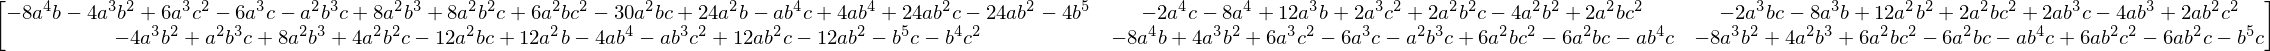

In [38]:
matrix = example_two.dixon_matrix(coeff, size)
matrix